## Exercise 3: Confidence interval and Hypothesis testing

This exercise is due September 21, 2015. Please save this notebook as a .pdf and .ipynb file and upload both files to the folder "GEO4310/Resources/Exercises/Hand-in of exercises" in Fronter. The report should answer all questions given in the exercise text and contain the relevant plots and output. For each python command given in this notebook, write a comment (a line starting with #) to demonstrate that you understand what it does.

#####Name:- Bikas Chandra Bhattarai
#####Date :- 21 September 2015

#####Question 1.
A sample of 20 random observations gave a mean of 145 and a variance of 30. What is the 95 % confidence interval for the mean: 

#####a) if the estimated variance is 30

For the calculation of the confidence interval one uses the following equations

$ L = \bar{x} - t_{1-\tfrac{\alpha }{2}};  N-1 * S_\bar{X} $

$ U = \bar{x} + t_{1-\tfrac{\alpha }{2}};  N-1 * S_\bar{X} $

whereas L is the lower limit, U is the upper limit of the interval, $\bar{x}$ is the mean of the sample, $S_\bar{X}$ is the standard error of the sample and N is the total number of values in the sample. The test uses the t-Distribution, which is dependent on α and N, in that case 0.05 and 20, respectively.

$ S_\bar{X}  = \frac{std}{\sqrt{N}}$

First the standard error of the sample mean is estimated from the sample standard deviation (std)


In [5]:
import math
import numpy as np
import scipy
std = math.sqrt(30)    # standard deviation
N = 20
Sx = std/math.sqrt(N)  # Standard error
alpha = 0.05
mean = 145

The value of $t_{1-\tfrac{\alpha }{2}}; N-1 $ can be calculated from python by using the function:

scipy.stats.t.ppf((1-(alpha/2)), N-1)

In [6]:
U = mean + scipy.stats.t.ppf((1-(alpha/2)), N-1)* Sx
L = mean - scipy.stats.t.ppf((1-(alpha/2)), N-1)* Sx

print('sample standard error             : %.2f' % Sx)
print('sample standard deviation         : %.2f' % std)
print('Confidence intervals are          : (%.1f, %.1f)' % (L, U))

sample standard error             : 1.22
sample standard deviation         : 5.48
Confidence intervals are          : (142.4, 147.6)


That means, that the mean of the sample lies with a confidence of 95 % in the interval [142.4; 147.6] if the real variance is unknown.

##### b) if the true variance is 30

In that case one assumes, that the variance calculated from the sample, is equal to the real variance of the population. In that case the z-Distribution is used, which depends on the parameter α = 0. 05. The calculation is the following:

$ L = \bar{x} - z_{1-\tfrac{\alpha }{2}};  * S_\bar{X} $

$ U = \bar{x} + z_{1-\tfrac{\alpha }{2}};  * S_\bar{X} $

The value of $z_{1-\tfrac{\alpha }{2}}$ can be calculated from python by using the function:

scipy.stats.norm.ppf((1-(alpha/2)))

In [7]:
u = mean + scipy.stats.norm.ppf((1-(alpha/2)))* Sx
l = mean - scipy.stats.norm.ppf((1-(alpha/2)))* Sx

print('Confidence intervals are          : (%.1f, %.1f)' % (l, u))

Confidence intervals are          : (142.6, 147.4)


The mean will be in the intervall [142.6; 147.4] with 95 % confidence if the calculated variance from the sample is equal to the variance of the population.

##### c) Are they different? In that case, why?

Yes they are different because we use t-test when the number of sample is higher then 30 and the variance is unknown.If the variance is unknown then the confidence interval is larger then with the test with know variance that is Z-test. 


##### d) 95 % confidence interval for the variance

For this calculation, one assumes, that the mean μ is unknown. The statistic test uses the χ 2 -Distribution. Its defining parameters are in that case α = 0. 05 and n = 20. The used equations are the following:

If xi ~ N(μ,σ² ) then (n-1)S²/σ² has the Chi-square distribution.

$Prob(χ²_{α/2,n-1} < (n-1)\frac{S_{x}^{2}}{\sigma_{x}^{2}} < χ²_{1-α/2,n-1} )$

where, 

$S_{x}^{2}$ = variance = 30


from python 

$χ²_{α/2,N-1}$ = chi2.ppf((alpha/2), df= (N-1))

$χ²_{1-α/2,N-1}$ = chi2.ppf((1-(alpha/2)), df = (N-1))

$lower = \frac{(N-1)*S_{x}^{2}}{χ²_{1-α/2,N-1}}$

$upper = \frac{(N-1)*S_{x}^{2}}{χ²_{α/2,N-1}}$

so the lower and upper confidence interval for variance can be calculated as follow:


In [8]:
from scipy.stats import chi2
variance = 30
upper = ((N-1)* variance)/chi2.ppf((alpha/2), df= (N-1))
lower = ((N-1)* variance)/chi2.ppf((1-(alpha/2)), df = (N-1))
print('Confidence intervals for variance are          : (%.1f, %.1f)' % (lower, upper))

Confidence intervals for variance are          : (17.4, 64.0)


The variance lies with 95 % confidence in the interval [17.4; 64.00] if one assumes an unknown mean.

##### Question 2: 

a) A hydrologist wants to determine the mean groundwater depth for a research site. Previous studies show that the mean depth is around 40 meters and standard deviation is 10 meters. She wants to test if this is correct. How many samples should she take in order to be 95%- sure that the estimated mean groundwater depth will not differ more than 5 meters.

Margin of error,E = $Z_{α/2} * S_x $

$S_x = \frac{\sigma}{\sqrt{N}}$

So, the sample size, $n = (\frac{Z_{α/2}*\sigma}{E})²$

Here,

alpha = 0.05

Error (E) = 5 m

standard deviation (sigma) = 10 m

by using normal distribution table:

In [9]:
scipy.stats.norm.ppf(alpha/2)
sigma = 10
E = 5
n = ((scipy.stats.norm.ppf(alpha/2)*sigma)/E)**2

n = 15.36 ~ 16

This value for n is now used for the t-Test:

$t_{1-α/2,N-1} = t_{1-α/2,16}$

and can be calculated from python:

In [10]:
t_value = scipy.stats.t.ppf((1-(alpha/2)), 15)

So $n =  (\frac{t-value * \sigma}{E})²$

In [11]:
n = ((t_value*sigma)/E)**2

print('Number of sample         : %.2f' % n)

Number of sample         : 18.17


As this is also an approximation, one can state, that the hydrologist has to take at least 18 samples.

b) A candidate running for president wants to know how many percent of all people will vote for him? He knows (hopes) that he will get around 40% percent and he is satisfied if the error in the estimation is less than 5%-units with a probability of 0.95. How many people must be included in the test poll?

In [12]:
t = scipy.stats.norm.ppf(0.975)
L = 35					#Lower limit i.e 40-5
U = 40					#Upper limit
p_40 = 40*(100-40)
print ('Number of people must included in is : %.1f' %
       (p_40/((U-L)/t)**2))

Number of people must included in is : 368.8


The number of people must be included to the test poll is 369.

#####Question 3.
In a river station, the annual mean discharge and standard deviation calculated from a 20 year sample data are 14.5 mm and 4.7 mm, respectively. Assume the annual discharge is normally distributed. Test the hypothesis that the population mean annual discharge is 16.4 mm. (α =5 %)

As the sample size is just 20, one assumes the variance as unknown. Therefore one has to
use the t-Test. The calculation with a confidence interval of 95 %, that means α = 0, 05,
is the following:

Test hypothesis are

H0: mu = 16.4

H1: mu $\neq$  16.4

The hypothesis H 0 is rejected if equ. (1) is true

$|t| > t_{n−1;1− \frac{\alpha}{2}}$..................(1)

And |t| is calculated by using equation (2)

$ |t| = \frac{\bar{x}-\mu}{s_x}* \sqrt{n}$..............(2)

where $s_x$ is the standard deviation
$\bar{x}$ is the  sample mean, $\mu$ is the population mean

In [13]:
#Given
import numpy as np
from scipy import stats
xbar = 14.5
mu= 16.4
sigma = 4.7
n=20   
df = n-1
# calculating test statistics
tt =  ((xbar - mu) / sigma)* np.sqrt(n)  		# t-statistic for mean

# calculating p-value from t-table by using the function from python
pval = stats.t.ppf(1- (0.05)/2, df)  			# two-sided pvalue at alpha = 0.05

print 't-statistic = %f pvalue = %f' % (np.abs(tt), pval) #np.abs is for getting absolute value

t-statistic = 1.807885 pvalue = 2.093024


As equation (1) is a false statement, the hypothesis H0 is not rejected. That means that the
mean discharge of the population can be 16.5 mm.

#####Question 4.
As above, but test the hypothesis that the population mean annual discharge is 16.4 mm with an alternative hypothesis that the mean annual discharge is less than 16.4 mm. (do not forget to state your assumptions)

This is a test on the mean with unknown variance, as the sample size is just 20. The calculation at a confidence interval of 95%, α = 0.05, is the following:

H0 : μ = μ1 ;

Ha : μ $\neq$ μ2

whereas μ1 = 16.4 mm and μ 2 = 14.5 mm. The hypothesis H0 is rejected if equ. (3) is
true.

$ μ_2 ≤ μ_1 − t_{n−1;1−α}* \frac{s_x}{\sqrt{n}}$..............(3)


In [14]:
mu2 = 14.5
mu1 = 16.4
sigma = 4.7 	# Standard deviation
n=20

# calculate by using equation 3
print 'test statists:', mu1-(np.abs(stats.t.ppf(0.05, df))*(sigma/np.sqrt(n))) 

print 'mu2:', mu2

test statists: 14.5827645009
mu2: 14.5


As this is a true statement, the hypothesis H0 is rejected. That means, the population mean cannot have the value of 16.4 mm with a confidence niveau of 95 %. At least the population mean will be nearer to 14.5 mm

#####Question 5.
As above, but test the hypothesis that the population mean annual discharge is 16.4 mm with an alternative hypothesis that the mean annual discharge is larger than 16.4 mm. (do not forget to state your assumptions)

H0: µ = 16.4 

Ha: µ > 16.4

if this statement is true then Ho is rejected: $ μ_2 \geqslant  μ_1 + t_{n−1;1−α}* \frac{s_x}{\sqrt{n}}$...............(4)


Assumption: We assume normal distribution and unknown variance since n is small




In [15]:

xbar = 14.5
mu= 16.4
sigma = 4.7       
n=20
# calculate by using equation 3

print 'test statists:', (mu + np.abs(stats.t.ppf(0.05, df))*(sigma/np.sqrt(n)))
print 'xbar:', xbar

test statists: 18.2172354991
xbar: 14.5


14.5 mm is not equal to or larger than 18.2 mm. The null hypothesis is therefore not rejected.

#####Question 6.
In Nassau on the Bahamas precipitation has been measured during two periods. The yearly amount of precipitation was 

1872 – 1890 (19 years): x¯ = 1346 mm, s = 333 mm 
1896 – 1919 (24 years): x¯ = 1152 mm, s = 262 mm 

#####a) Is the difference between the mean values of the two periods significant? What is/are your assumptions?


Assumption: We assume normal distribution with unknown variance


The hypothesis tested is, that there is no difference in the two values, which means δ = 0. The confidence
interval will be 95 %, which means α = 0.05. 

Hypothesis:

H0 : μ1 − μ2 = δ

Ha : μ1 − μ2 = δ

$|\frac{\bar{x_1}-\bar{x_2}-δ}{\sqrt{\frac{s_1^{2}}{n_1}-\frac{s_2^{2}}{n_2}}}| > \frac{w_1 t_1+ w_2 t_2}{w_1+w_2}$..............(5)

$w_1 = \frac{s_1^{2}}{n_1}$

$w_2 = \frac{s_2^{2}}{n_2}$

The hypothesis H0 will be rejected if equ. (5) is true.

In [16]:
import scipy.stats as stats
N1 = 19 
mu1= 1346 
s1 = 333 
N2 = 24
mu2= 1152
s2 = 262

def welch_t_test(mu1, s1, N1, mu2, s2, N2): 
   # Construct arrays to make calculations more succint.
    N_i = np.array([N1, N2])
    dof_i = N_i - 1
    v_i = np.array([s1, s2]) ** 2
    # Calculate t-stat, degrees of freedom, use scipy to find p-value.
    t = (mu1 - mu2) / np.sqrt(np.sum(v_i / N_i))
    dof = (np.sum(v_i / N_i) ** 2) / np.sum((v_i ** 2) / ((N_i ** 2) * dof_i))
    p = stats.distributions.t.sf(np.abs(t), dof) * 2
    return t

ts = welch_t_test(mu1, s1, N1, mu2, s2, N2) # test statistics

t1 = stats.t.ppf(1- (1-0.95)/2, 18)
t2 = stats.t.ppf(1- (1-0.95)/2, 23)
w1 = ((s1**2)/N1)
w2 = ((s2**2)/N2)        
ts1 = (w1*t1 + w2*t2)/(w1+w2)


$|\frac{\bar{x_1}-\bar{x_2}-δ}{\sqrt{\frac{s_1^{2}}{n_1}-\frac{s_2^{2}}{n_2}}}|$ = 2.08037

$\frac{w_1 t_1+ w_2 t_2}{w_1+w_2}$ = 2.0903

From equation 5:

2.0803 > 2.0903

This is a false statement, which means that H0 is not rejected and the difference is not significant at a confidence niveau of 95 %.

#####b) Is the difference between the variances of the two periods significant? 	What 	is/are your assumptions?

To test the hypothesis that the sample variances of two normal distributed populations 
are equal, one uses the F -Test. As in the questions above one assumes that the confidence
interval is equal to 95 %, α = 0.05 and that both samples are normally distributed.

Test hypothesis are:

H0 : $σ_1^{2} = σ_2^{2}$ ;

H0 : $ σ_1^{2} \neq  σ_2^{2}$

The hypothesis H 0 is rejected if equ. (6) is true.

$ F_c= \frac{s_1^{2}}{s_2} > F_{1−α;n1 −1;n2 −1}$................(6)

In [20]:
from __future__ import division
N1 = 19 
s1 = 333 
N2 = 24
s2 = 262
alpha = 0.05
         
F = s1**2/s2**2

ft = 2.09 # f 1-alpha, N1-1, N2-1,= 2.09

print 'calculated value for F-test :',  F
print  'Table value for F-test      :', ft

calculated value for F-test : 1.61542159548
Table value for F-test      : 2.09


As this statement is false on the basis of equation 6 and the hypothesis H0 cannot be rejected. The variance is not
significant different if both samples can be considered as normally distributed.

#####Question 7.
The data from 1879-1998 can be found in the file columbia_y.dat (format: year, mean Q, max Q, min Q). Q is in cf/s. The drainage area is 237000 square miles. (it may be a good idea to multiply the runoff values by a conversion factor to get mm/year, 1 foot=0.305 m, 1 mile = 1609 m).

a) Draw observed and expected (assuming normal distribution) frequencies for the max Q data (~10 classes). 

/home/bikascb/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


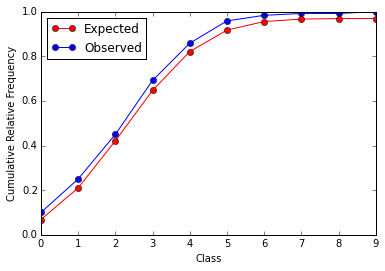

In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt

data= pd.read_table('columbia_y.dat',header=None,names=['year','mean','max','min','nan','nan'])

#Deleating other columns which is not required in this calculation by using 'drop' function 

maximum = (data.drop(['nan','mean','min'],axis=1))

#converting the discharge unit from cf/s to mm/year by multipling 0.001458296

maximum['max'] *= 0.001458296 #converting cf per sec to mm per year

#Remove data at the last row with NaN value

maximum = maximum[:-1]

#Calculating relative frequency from observed data sets by defining 10 classs intervals beginning with 300 mm/a in the first class and ending with 1800 mm/a in the last class. Upper and lower value for class are chosen on the basis of minimum and maximum value of maximum discharge in mm/year. 

relfreq,lowlim,binsize,extrapoints = stats.relfreq(maximum,numbins=10,defaultreallimits=(300,1800))

#Calculating cumulative relative frequency

cum_relfreq = np.cumsum(relfreq)

Observed = pd.DataFrame(cum_relfreq)

#Calculating Expected cumulative relative frequency

# Calc the max and mean of the annual maximum discharges
std= 257.6
mean= 781.1

def float_range(initVal, itemCount, step):
    for x in xrange(itemCount):
        yield initVal
        initVal += step

L=[x for x in float_range(300, 10, 150)]
L=pd.DataFrame(L)
U=[y for y in float_range(450, 10, 150)]
U = pd.DataFrame(U)

exp = scipy.stats.norm.cdf((U-mean)/std)-scipy.stats.norm.cdf((L-mean)/std)
exp_cufre = np.cumsum(exp)

Expected = pd.DataFrame(exp_cufre)


plt.plot(Expected,color='r',marker="o")
plt.plot(Observed,color='b',marker="o")
plt.legend(['Expected', 'Observed'], loc='upper left') 
plt.xlabel('Class') 
plt.ylabel('Cumulative Relative Frequency') 
plt.show()

#### Plot in lognormal distribution

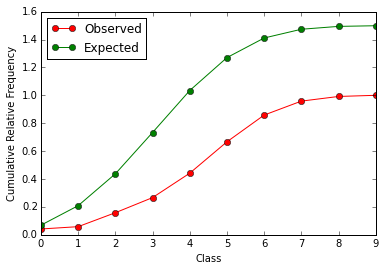

In [56]:
# Take the logarithm of the annual maximum discharges to testing whether they are lognormal
lognorm = np.log(maximum['max'])
#print(lognorm)

#Calculating relative frequency from observed data sets by defining 10 classs intervals beginning with 300 mm/a 
#in the first class and ending with 1800 mm/a in the last class. Upper and lower value for class are chosen
#on the basis of minimum and maximum value of maximum discharge in mm/year. 

relfreq,lowlim,binsize,extrapoints = stats.relfreq(lognorm,numbins=10,defaultreallimits=(np.log(300),np.log(1800)))

# Calculating standard deviation and mean

std= np.std(lognorm)
mean = np.mean(lognorm)
#Calculating cumulative relative frequency

cum_relfreq = np.cumsum(relfreq)
Observed1 = pd.DataFrame(cum_relfreq)

L = np.linspace(np.log(300), np.log(1650), num=10)
U = np.linspace(np.log(450), np.log(1800), num=10)

exp = scipy.stats.norm.cdf((U-mean)/std)-scipy.stats.norm.cdf((L-mean)/std)
exp_cufre = np.cumsum(exp)

Expected1 = pd.DataFrame(exp_cufre)


plt.plot(Observed1,color='r',marker="o")


plt.plot(Expected1,color='g',marker="o")

plt.legend(['Observed', 'Expected'], loc='upper left') 
plt.xlabel('Class') 
plt.ylabel('Cumulative Relative Frequency') 



##### b) Perform both the χ2 and the Kolmogorov-Smirnov test to answer : Can the yearly mean runoff in the Columbia River at the Dalles, Oregon be asssumed to be normally distributed?

### chi square test

##### Defining the Hypothesis

H0 : Mean Discharge is normally distributed

Ha : Mean Discharge is not normally distributed

In [1]:
# Importing the required modules
from collections import Counter
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from pandas import Series
import matplotlib.pyplot as plt

In [2]:
# Reading the data table
data = pd.read_table('columbia_y.dat',header=None,names=['year','mean','max','min','nan','nan'])

#Selecting only mean from the datasets 
Q_mean = data['mean']
#Defining dataframe

Q_mean = pd.DataFrame(Q_mean)

# Converting the mean discharge in mm per year 

Q_mean['mean'] *= 0.001458296

#removing the NaN value at the bottom of datasets
Q_mean = Q_mean[:-1]

In [3]:
#calculating mean maximum and minimum value from datasets
print max(Q_mean['mean'])
print min(Q_mean['mean'])

457.344958336
172.234965672


First one has to group the data for the mean discharge in classes. In that case the class width is 30, starting with 170 in the first class and ending with 470 in the last class. This classification is chosen because the minimum and maximum values are 457.34 and 172.23 respectively.


In [53]:
# calculating the observedfrequency for each class
a = scipy.stats.histogram(Q_mean, numbins=10, defaultlimits= (170, 470))

# Here numbins = number of class, defaultlimits = lower and higher class value

In [27]:
#Creating the dataseries for frequency
fre=Series(a)
#Defining the dataframe for frequency
df = pd.DataFrame(fre[0])

From the frequency calculation, it is observed that the last three class has the frequency less then 3. As many statisticians recommend classes are combined if the expected number in a class is less than 3.

In [28]:
#removing the last two class frequency
df1 =df[:-2]

In [29]:
# Adding 1 to the class 8 so that the total frequency becomes 3 which is equals to the sum of the 
#previous last three class

df1[-1:] += 1

/home/bikascb/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/bikascb/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.ix._setitem_with_indexer(key, value)
/home/bikascb/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return

In [30]:
# Add observed frequency to the dataframe table
df1['freq'] = df1

/home/bikascb/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [31]:
# Defining the lower class intervals
l = range(170,470,30)
# it means lower class is 170 and higher class is 470 with equal interval of 30.
#defining the dataframe for lower class
l= pd.DataFrame(l)
l = l[:8]

In [32]:
# Defining higher class intervals 
h = range(200,500,30)
h = pd.DataFrame(h)
h= h[:8]
h[-1:] += 60


Expected absolute frequency = $ [P(\frac{U - mean}{std} - P(\frac{L - mean}{std}]*n_{total}$--------------(1)

formula for the $\chi_c ^{2} =  \sum_{j=1}^{n} \frac{(O_j - E_j)^{2}}{E_j}$-----------------------(2)

In [33]:
# Calculating standard deviation
std = np.std(Q_mean['mean'])

# calculating mean
mean = np.mean(Q_mean['mean'])

# calculating the expected absolute frequency by using the equation ---------(1)

df1['exp'] = (scipy.stats.norm.cdf((h-mean)/std)-scipy.stats.norm.cdf((l-mean)/std))*120

# calculating the chi-test statistics using the equation ------(2)

df1['chi_test'] = (df1['freq']-df1['exp'])**2/df1['exp']

print df1
print('Sum: %.4f' %     sum(df1['chi_test']))

    0  freq        exp  chi_test
0  13    13   5.876735  8.634200
1  12    12  13.025190  0.080691
2  14    14  21.403861  2.561087
3  31    31  26.080180  0.928085
4  23    23  23.564592  0.013527
5  16    16  15.788090  0.002844
6   8     8   7.842936  0.003145
7   3     3   3.836038  0.182209
Sum: 12.4058


/home/bikascb/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/bikascb/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
# Calculating standard deviation
std = np.std(Q_mean['mean'])

# calculating mean
mean = np.mean(Q_mean['mean'])


print std

print mean

54.1626210071
279.824131458


In [9]:
scipy.stats.norm.cdf(-1.45)

0.073529259609648359

#### Chi squre value can be calculated from python by using the function below:

$\chi ^{2}_{0.95;k-p-1} $ 

Whereas k is the number of classes and p is the number of parameters of the specified distribution and the function becomes:

$\chi ^{2}_{0.95;8-2-1} $ = chi2.ppf(0.95, df= 5)



In [34]:
from scipy.stats import chi2
chi2.ppf(0.95, df= 5) 

11.070497693516351

Here, calculated chi-squre value (12.4058) is greater than the chi-squre table value (11.07049), therefore the hypothesis H0 is rejected, with a confidence intervals of 95 % and one can say that the mean discharge is not normally distributed.

##### Making plot for expected and observed frequency

### Kolmogorov-Smirnov-Test

##### H 0 : Mean Discharge ∼ N (μ; σ 2 )

In [35]:
%matplotlib inline
from collections import Counter
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt

data = pd.read_table('columbia_y.dat',header=None,names=['year','mean','max','min','nan','nan'])
Q_mean = (data.drop(['nan','max','min'],axis=1))
Q_mean['mean'] *= 0.001458296
Q_mean = Q_mean[:-1]
Q_mean = Q_mean.drop(['year'] ,axis = 1)

/home/bikascb/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [39]:
std = np.std(Q_mean['mean'])
m = np.mean(Q_mean['mean'])

# constructing table for different calculation (compendium page 93)
x = pd.DataFrame(Q_mean)
x['sorted'] = sorted(Q_mean['mean'])
x['m'] = range(1,121,1)
x['FQ_ob']= x['m']/len(x)
x['z'] = (x['sorted']-m)/std
x['FQ_exp']= scipy.stats.norm.cdf(x['z'])
x['D'] = np.abs(x['FQ_exp']-x['FQ_ob'])

x.head()

,mean,sorted,m,FQ_ob,z,FQ_exp,D
0,352.836175,172.234966,1,0.008333,-1.986410,0.023494,0.015161
1,385.415966,174.419493,2,0.016667,-1.946077,0.025823,0.009156
2,367.820167,175.637170,3,0.025000,-1.923595,0.027203,0.002203
3,337.755937,177.798365,4,0.033333,-1.883693,0.029803,0.003530
4,309.416870,187.707486,5,0.041667,-1.700742,0.044496,0.002829


In [37]:
x['D'].max()

0.039328897564306173

max |D| = 0.039328897564306173

for $\alpha = 0.05, n = 120, D_{critical} = D_{critical}= \frac{1.36}{\sqrt{n}}$

http://dlc.erieri.com/onlinetextbook/index.cfm?fuseaction=textbook.appendix&FileName=Table7

Here, $ max|D| \geq  D_{critical}= \frac{1.36}{\sqrt{120}} = 0.1242$



Which is a false statement and therefore the hypothesis H 0 is not rejected. That means, that with a confidence niveau of 95 % the mean discharge is normally distributed.

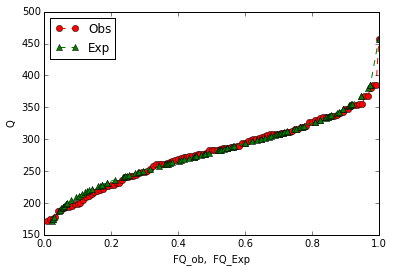

In [38]:

plt.plot(x['FQ_ob'],x['sorted'],'--ro', x['FQ_exp'],x['sorted'], '--g^')
plt.legend(['Obs', 'Exp'],loc='upper left')
plt.xlabel('FQ_ob,  FQ_Exp') 
plt.ylabel('Q') 
